In [1]:
#import iris dataset
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris_csv=pd.read_csv('iris.csv')

In [3]:
iris_csv

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# 1.Create a user-defined function to compute pairwise Pearson correlation coefficients.

In [6]:
def cal_correlation(X,Y):
    
    mean_X=np.zeros(len(X))
    mean_X.fill(np.mean(X))
    
    mean_Y=np.zeros(len(Y))
    mean_Y.fill(np.mean(Y))
    
    X_Values=np.subtract(X,mean_X)
    Y_Values=np.subtract(Y,mean_Y)
    
    Cov_XY=np.sum(np.multiply(X_Values,Y_Values))
    
    S_X=sqrt(np.sum(np.square(X_Values)))
    S_Y=sqrt(np.sum(np.square(Y_Values)))
    correlation=(Cov_XY)/(S_X*S_Y)
    
    return correlation
    
    
    

In [5]:
def Pearson_coeff(X,Y):
    x = np.mean(X)
    y = np.mean(Y)
    X = X-x
    Y = Y-y
    return sum(X*Y)/((sum(X**2)*sum((Y**2)))**0.5)

In [6]:
x = [10,20,30,40,50]
y = [65,82,30,2,77]

In [7]:
Pearson_coeff(x,y)

-0.2590040226874663

In [7]:
cal_correlation(iris_csv['sepal.length'],iris_csv['sepal.width'])

-0.11756978413300205

In [8]:
cal_correlation(iris_csv['sepal.length'],iris_csv['petal.length'])

0.8717537758865832

In [9]:
cal_correlation(iris_csv['sepal.length'],iris_csv['petal.width'])

0.8179411262715757

In [10]:
cal_correlation(iris_csv['sepal.width'],iris_csv['petal.length'])

-0.4284401043305397

In [11]:
cal_correlation(iris_csv['sepal.width'],iris_csv['petal.width'])

-0.366125932536439

In [12]:
cal_correlation(iris_csv['petal.length'],iris_csv['petal.width'])

0.9628654314027961

In [14]:
cal_correlation(iris_csv['sepal.length'],iris_csv['sepal.length'])

1.0

In [13]:
iris_csv.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


# 2.plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix. (6 points)

In [17]:
import matplotlib.pyplot as plot

def scatter_plot(X,Y,xlabel,ylabel):

    plot.scatter(X,Y)

    plot.title('Plot between '+f'{xlabel} ' + ' and ' + f'{ylabel}')

    plot.xlabel(xlabel)

    plot.ylabel(ylabel)

    plot.show()

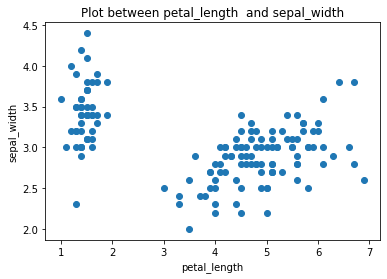

In [18]:
scatter_plot(iris_csv['petal.length'],iris_csv['sepal.width'],'petal_length','sepal_width')

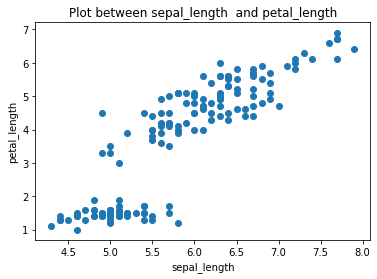

In [19]:
scatter_plot(iris_csv['sepal.length'],iris_csv['petal.length'],'sepal_length','petal_length')

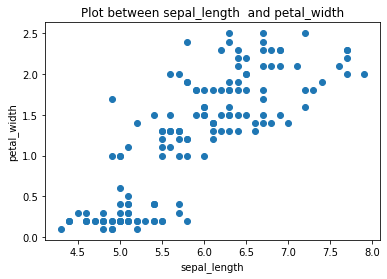

In [21]:
scatter_plot(iris_csv['sepal.length'],iris_csv['petal.width'],'sepal_length','petal_width')

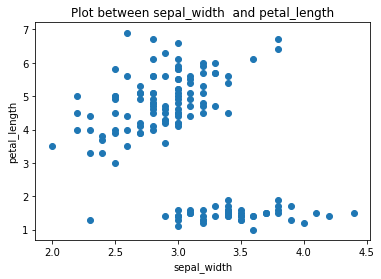

In [22]:
scatter_plot(iris_csv['sepal.width'],iris_csv['petal.length'],'sepal_width','petal_length')

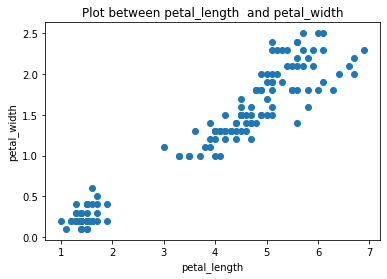

In [23]:
scatter_plot(iris_csv['petal.length'],iris_csv['petal.width'],'petal_length','petal_width')

In [77]:
import matplotlib.pyplot as plt
def visualization(x, y): #x, y are two variable
    plt.scatter(x, y) 
    plt.title('Correlation between {} and {}'.format(x.name, y.name))
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

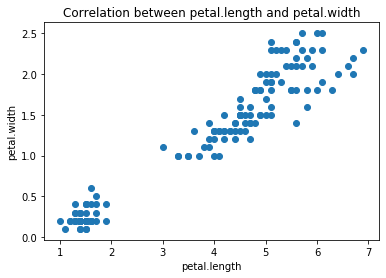

In [78]:
visualization(iris_csv['petal.length'],iris_csv['petal.width'])

In [15]:
corr = iris_csv.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


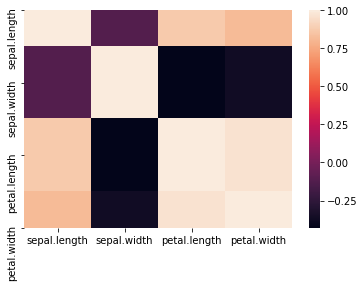

In [99]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Perform z-score standardization on the data.

In [34]:
from sklearn.preprocessing import StandardScaler
iris__df_standard_scale=pd.DataFrame(StandardScaler().fit_transform(iris_csv[['sepal.length','sepal.width','petal.length','petal.width']]))

In [35]:
iris__df_standard_scale

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [91]:
df_num=(iris_csv['sepal.length']-iris_csv['sepal.length'].mean())/iris_csv['sepal.length'].std()

In [92]:
df_num

0     -0.897674
1     -1.139200
2     -1.380727
3     -1.501490
4     -1.018437
         ...   
145    1.034539
146    0.551486
147    0.793012
148    0.430722
149    0.068433
Name: sepal.length, Length: 150, dtype: float64

In [89]:
z_score = (df_num-df_num.mean())/(df_num.std())

In [90]:
z_score

,petal.length,petal.width,sepal.length,sepal.width,variety
0,-1.335752,-1.311052,-0.897674,1.015602,NaN
1,-1.335752,-1.311052,-1.139200,-0.131539,NaN
2,-1.392399,-1.311052,-1.380727,0.327318,NaN
3,-1.279104,-1.311052,-1.501490,0.097889,NaN
4,-1.335752,-1.311052,-1.018437,1.245030,NaN
...,...,...,...,...,...
145,0.816859,1.443994,1.034539,-0.131539,NaN
146,0.703564,0.919223,0.551486,-1.278680,NaN
147,0.816859,1.050416,0.793012,-0.131539,NaN
148,0.930154,1.443994,0.430722,0.786174,NaN


# Compute covariance matrix for the standardized data. 

In [69]:
cov=np.cov(iris__df_standard_scale,rowvar=False)

In [125]:
cov

,0,1,2,3
0,1.006711,-0.118359,0.877604,0.823431
1,-0.118359,1.006711,-0.431316,-0.368583
2,0.877604,-0.431316,1.006711,0.969328
3,0.823431,-0.368583,0.969328,1.006711


# Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending order.

In [84]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [85]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [86]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])